In [45]:
import json
import os
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def load_trials_dict(result_dict_location):
  if os.path.exists(result_dict_location):
    with open(result_dict_location, 'r') as f:
      data = json.load(f)
      return data
  return None

In [47]:
DATA_PATH_TO_PLOT = "./trial_results._128_first.json"
#DATA_PATH_TO_PLOT = '/content/trial_results.json'

In [48]:
data = load_trials_dict(DATA_PATH_TO_PLOT)

In [49]:
data.keys()

dict_keys(['0.0_first', '0.5_first', '0.1_first', '0.2_first', '0.3_first', '0.4_first'])

In [50]:
data[list(data.keys())[0]]

{'0.0_test': [0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161,
  0.9161],
 '0.0_train': [0.97858,
  0.97904,
  0.97902,
  0.98068,
  0.9786,
  0.9792,
  0.97872,
  0.97912,
  0.97918,
  0.9789,
  0.97918,
  0.9783,
  0.97902,
  0.9783,
  0.97944,
  0.97894,
  0.97976,
  0.97972,
  0.9787,
  0.97892],
 '0.1_test': [0.9145,
  0.9149,
  0.9131,
  0.9145,
  0.9164,
  0.9127,
  0.9118,
  0.9136,
  0.9145,
  0.9151,
  0.9155,
  0.915,
  0.9136,
  0.9143,
  0.9152,
  0.9155,
  0.9139,
  0.9133,
  0.9139,
  0.915],
 '0.1_train': [0.977,
  0.97706,
  0.97754,
  0.97646,
  0.97684,
  0.97742,
  0.97762,
  0.97684,
  0.9779,
  0.97778,
  0.9766,
  0.978,
  0.9766,
  0.9773,
  0.97772,
  0.97754,
  0.97714,
  0.97682,
  0.978,
  0.97724],
 '0.2_test': [0.9097,
  0.9113,
  0.9131,
  0.9101,
  0.9106,
  0.912,
  0.9152,
  0.9106,
  0.912,
  0.9113,
  0.9122,
  0.

In [51]:
std_dict = {}
for model_key in data.keys():
  for dropout_key, scores in data[model_key].items():
      if std_dict.get(model_key) is None:
        std_dict[model_key] = {}
      scores = np.array(scores)
      std_dict[model_key][dropout_key] = round(scores.std(), 6)
      data[model_key][dropout_key] = round(scores.mean(), 6)
      # print(np.round(np.sqrt(np.mean(np.power(arr - arr.mean(), 2))), 5), np.round(arr.std(), 5))

In [52]:
def get_data_as_tuples(primary_key):
  train_rate_acc, test_rate_acc = [], []
  for key in data[primary_key].keys():
    rate = round(float(key.split("_")[0]), 1)
    acc = data[primary_key][key]
    std = std_dict[primary_key][key]
    if "train" in key:
      train_rate_acc.append((rate, acc, std))  # (dropout_rate, accuracy-20-epochs)
    elif "test" in key:
      test_rate_acc.append((rate, acc, std))
  return train_rate_acc, test_rate_acc

In [53]:
train_rate_acc, test_rate_acc = get_data_as_tuples(list(data.keys())[0])

In [54]:
train_rate_acc

[(0.0, 0.979066, 0.000532),
 (0.1, 0.977271, 0.000473),
 (0.2, 0.974873, 0.000708),
 (0.3, 0.959125, 0.000861),
 (0.4, 0.952927, 0.000729),
 (0.5, 0.944055, 0.000709),
 (0.6, 0.928859, 0.000779),
 (0.7, 0.90122, 0.000924),
 (0.8, 0.837559, 0.001339),
 (0.9, 0.61891, 0.001689),
 (1.0, 0.1, 0.0)]

In [55]:
test_rate_acc

[(0.0, 0.9161, 0.0),
 (0.1, 0.914315, 0.001066),
 (0.2, 0.91181, 0.001381),
 (0.3, 0.89518, 0.001171),
 (0.4, 0.890205, 0.001399),
 (0.5, 0.882705, 0.001729),
 (0.6, 0.871845, 0.002501),
 (0.7, 0.85095, 0.002052),
 (0.8, 0.79966, 0.002741),
 (0.9, 0.61709, 0.003423),
 (1.0, 0.1, 0.0)]

In [56]:
def get_unpacked_xy(test_list, train_list):
  test_rate = np.array([tup[0] for tup in test_list])
  test_acc = np.array([tup[1] for tup in test_list])
  test_std = np.array([tup[2] for tup in test_list])
  train_rate = np.array([tup[0] for tup in train_list])
  train_acc = np.array([tup[1] for tup in train_list])
  train_std = np.array([tup[2] for tup in train_list])
  return test_rate, test_acc, test_std, train_rate, train_acc, train_std

0.0_first [0.000532 0.000473 0.000708 0.000861 0.000729 0.000709 0.000779 0.000924
 0.001339 0.001689 0.      ]


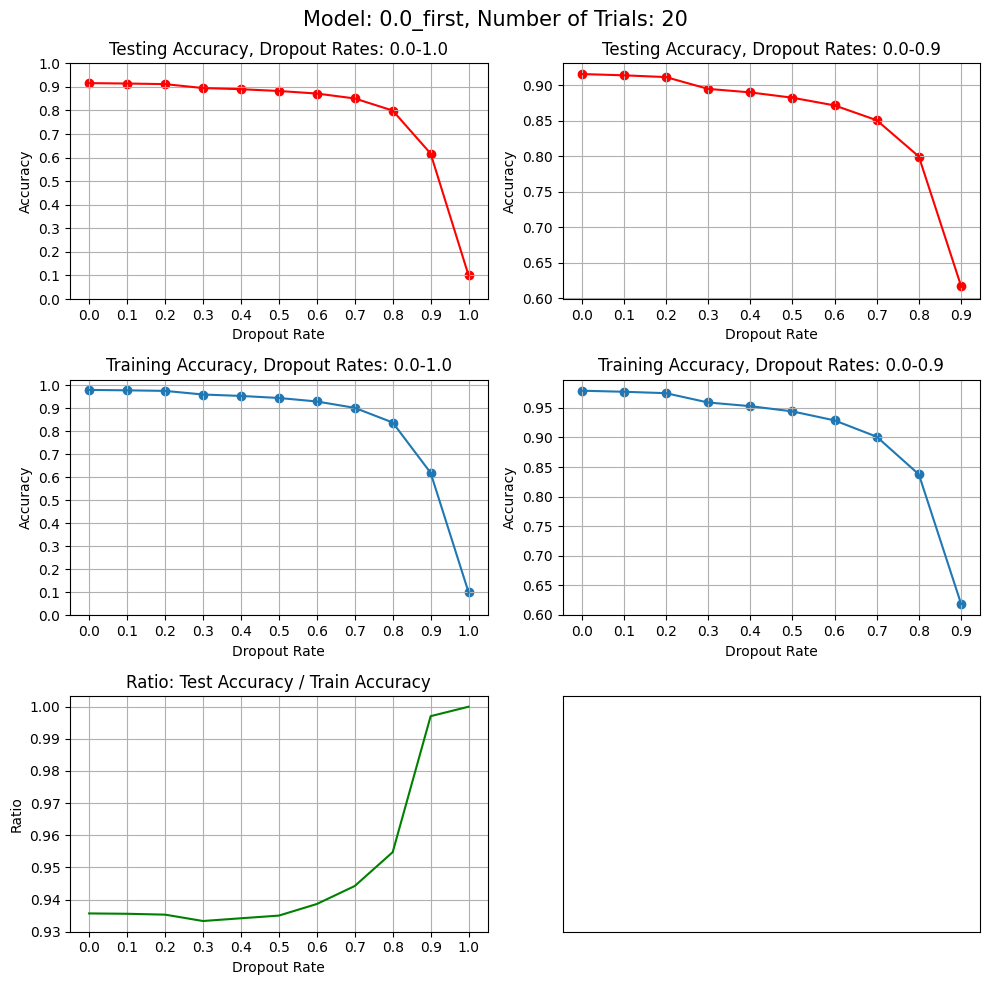

0.5_first [0.000593 0.000512 0.000689 0.000654 0.000775 0.000643 0.00061  0.000538
 0.000874 0.000989 0.      ]


<Figure size 640x480 with 0 Axes>

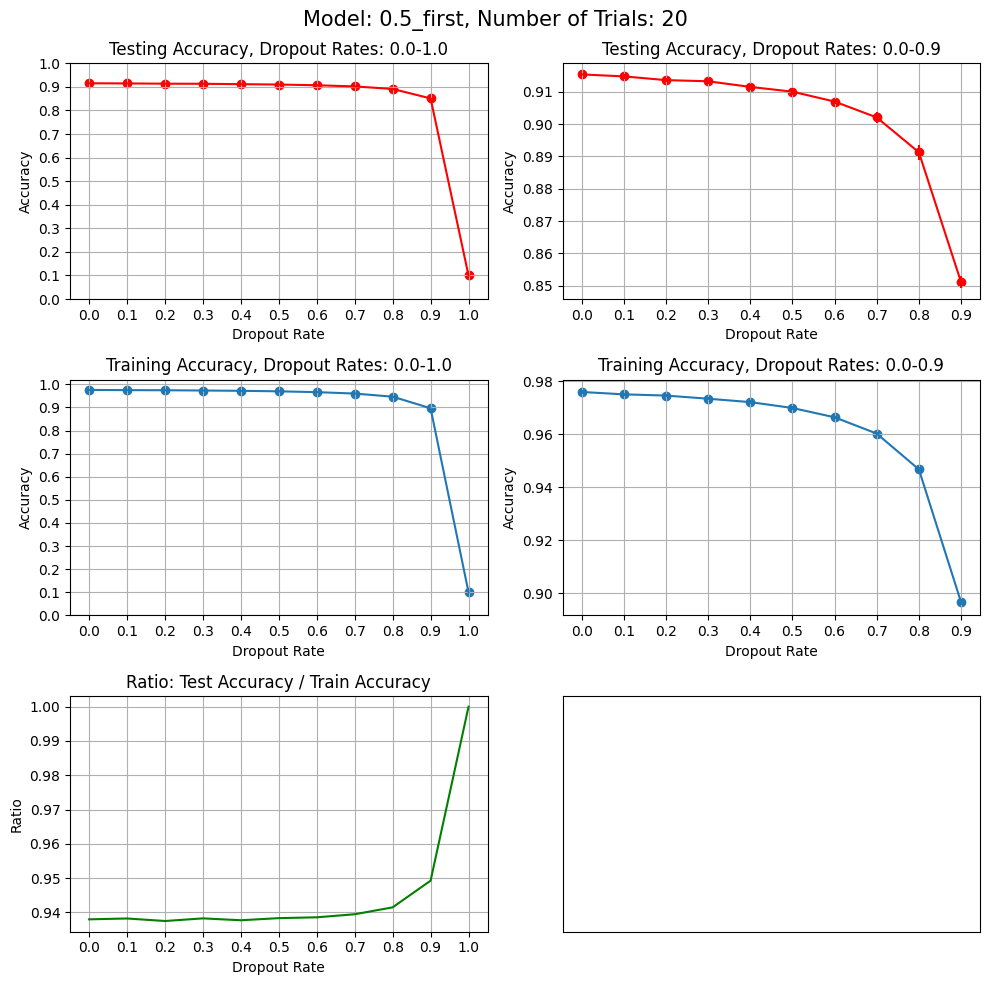

0.1_first [0.002843 0.000656 0.000632 0.000603 0.000731 0.000714 0.000677 0.000713
 0.001421 0.001949 0.      ]


<Figure size 640x480 with 0 Axes>

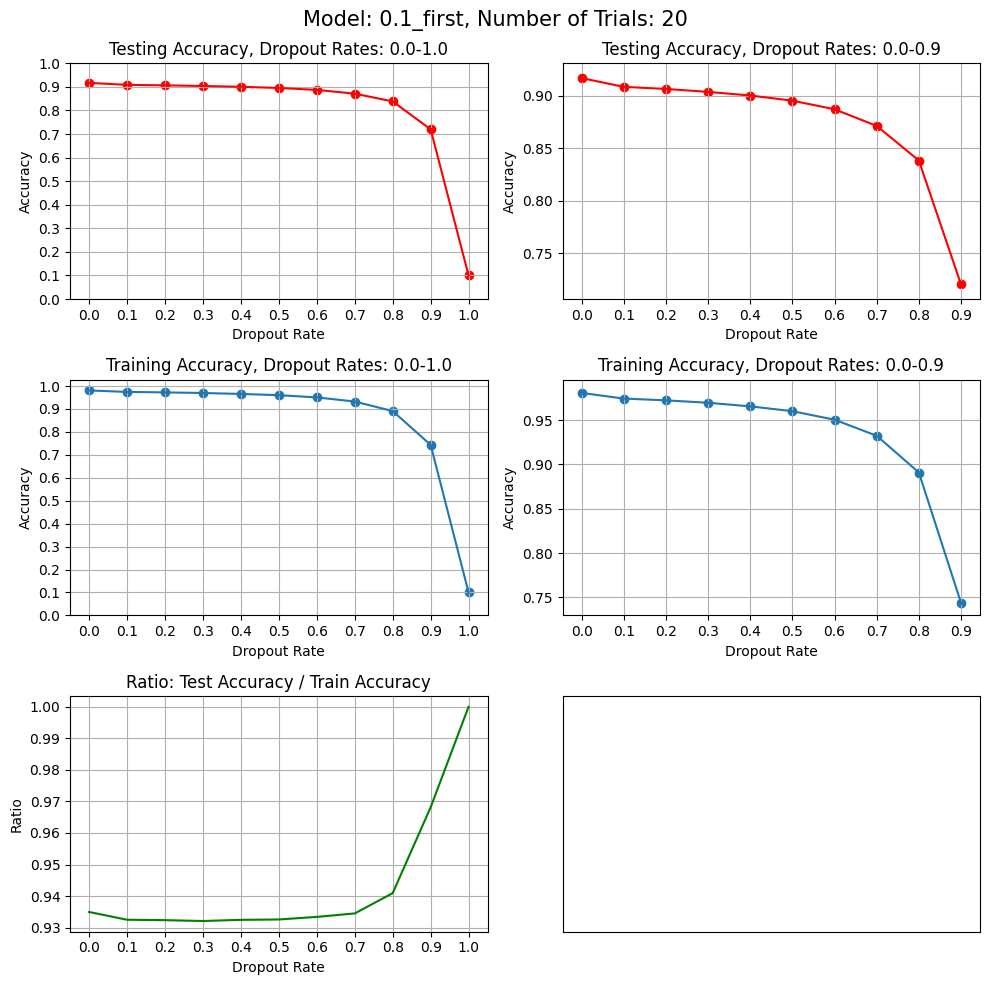

0.2_first [0.000395 0.00059  0.000849 0.000584 0.000799 0.000743 0.000838 0.008424
 0.000671 0.001117 0.      ]


<Figure size 640x480 with 0 Axes>

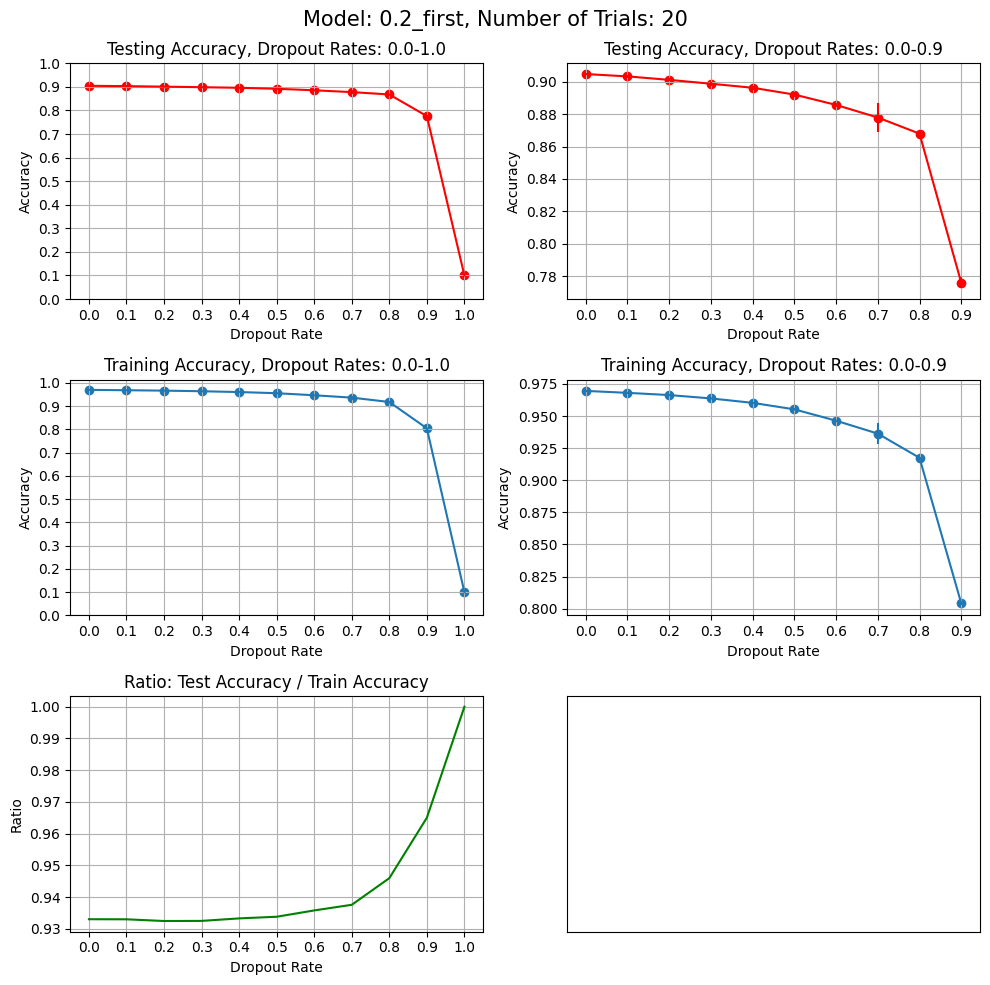

0.3_first [0.000639 0.000539 0.001801 0.000375 0.000515 0.000511 0.000697 0.000706
 0.00059  0.00153  0.      ]


<Figure size 640x480 with 0 Axes>

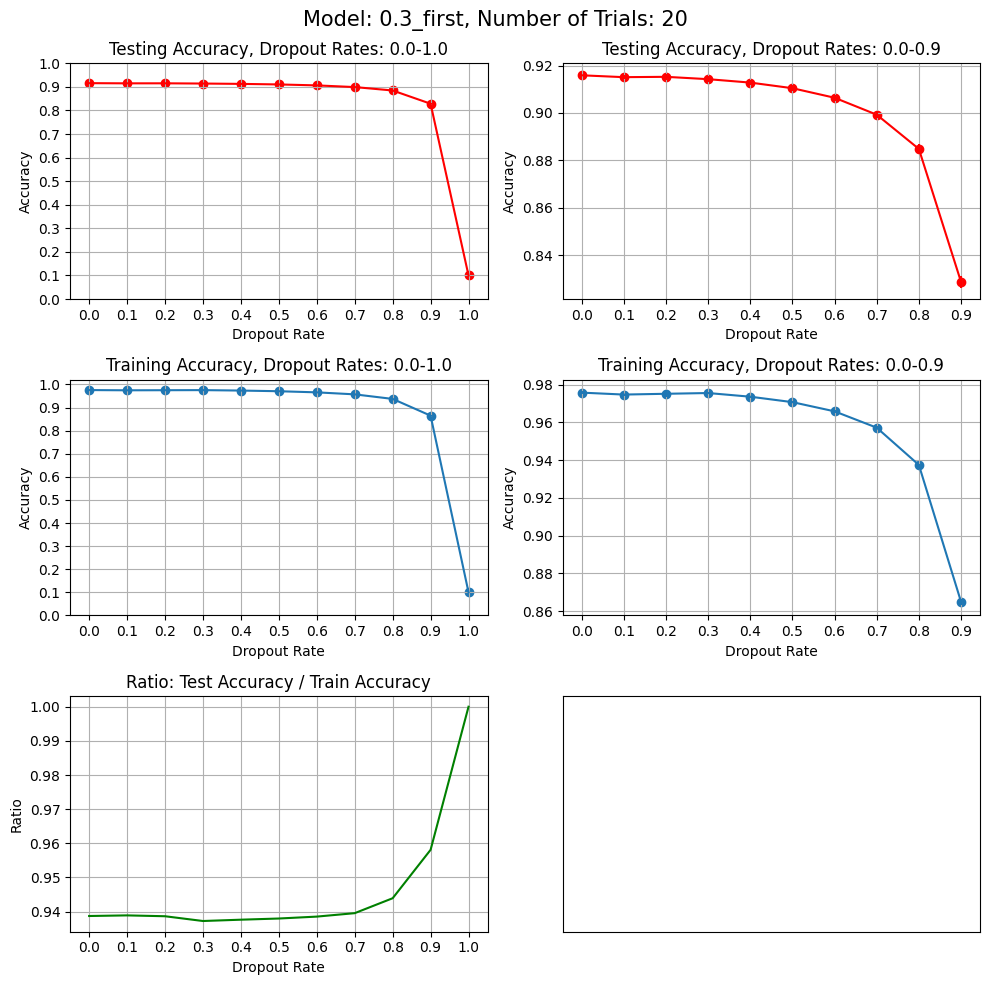

0.4_first [0.000664 0.000986 0.000694 0.00766  0.000503 0.000488 0.000621 0.000666
 0.000722 0.001281 0.      ]


<Figure size 640x480 with 0 Axes>

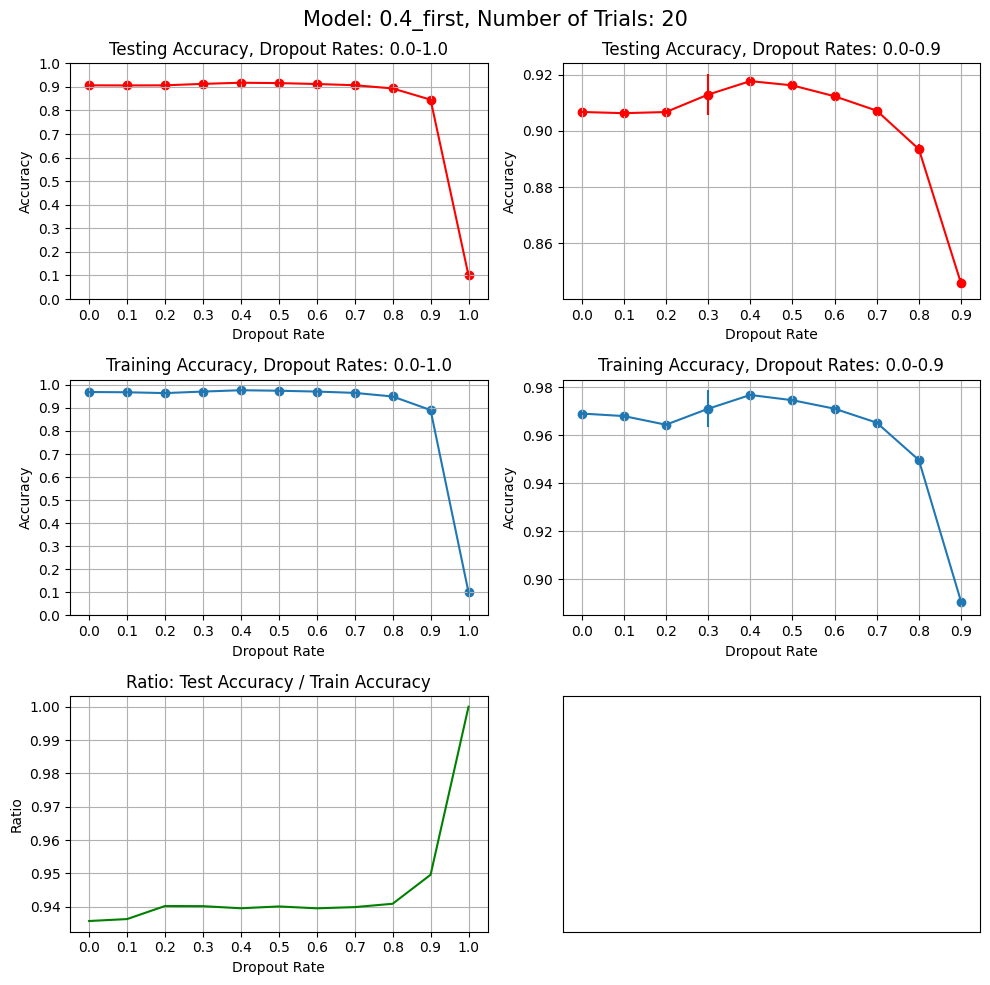

<Figure size 640x480 with 0 Axes>

In [57]:
for primary_key in data.keys():
  train_rate_acc, test_rate_acc = get_data_as_tuples(primary_key)
  test_rate, test_acc, test_std, train_rate, train_acc, train_std = get_unpacked_xy(test_rate_acc, train_rate_acc)
  print(primary_key, train_std)
  fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), layout='tight')
  fig.suptitle(f"Model: {primary_key}, Number of Trials: 20", fontsize=15)
  ax[0, 0].scatter(test_rate, test_acc, c='r')
  ax[0, 0].errorbar(test_rate, test_acc, test_std, c='r')
  ax[0, 0].grid(True)
  ax[0, 0].set_xticks(test_rate)
  ax[0, 0].set_yticks(np.arange(0, 1.1, 0.1))
  ax[0, 0].set_title('Testing Accuracy, Dropout Rates: 0.0-1.0')
  ax[0, 0].set_xlabel('Dropout Rate')
  ax[0, 0].set_ylabel('Accuracy')

  ax[0, 1].scatter(test_rate[:-1], test_acc[:-1], c='r')
  ax[0, 1].errorbar(test_rate[:-1], test_acc[:-1], yerr=test_std[:-1], c='r')
  ax[0, 1].grid(True)
  ax[0, 1].set_xticks(test_rate[:-1])
  ax[0, 1].set_title('Testing Accuracy, Dropout Rates: 0.0-0.9')
  ax[0, 1].set_xlabel('Dropout Rate')
  ax[0, 1].set_ylabel('Accuracy')

  ax[1, 0].scatter(train_rate, train_acc)
  ax[1, 0].errorbar(train_rate, train_acc, train_std)
  ax[1, 0].set_xticks(train_rate)
  ax[1, 0].set_yticks(np.arange(0, 1.1, 0.1))
  ax[1, 0].grid(True)
  ax[1, 0].set_title("Training Accuracy, Dropout Rates: 0.0-1.0")
  ax[1, 0].set_xlabel('Dropout Rate')
  ax[1, 0].set_ylabel('Accuracy')

  ax[1, 1].scatter(train_rate[:-1], train_acc[:-1])
  ax[1, 1].errorbar(train_rate[:-1], train_acc[:-1], train_std[:-1])
  ax[1, 1].set_xticks(train_rate[:-1])
  ax[1, 1].grid(True)
  ax[1, 1].set_title("Training Accuracy, Dropout Rates: 0.0-0.9")
  ax[1, 1].set_xlabel('Dropout Rate')
  ax[1, 1].set_ylabel('Accuracy')

  ratio = test_acc / train_acc
  ax[2, 0].plot(train_rate, ratio, 'g')
  ax[2, 0].set_xticks(train_rate)
  ax[2, 0].grid(True)
  ax[2, 0].set_title("Ratio: Test Accuracy / Train Accuracy")
  ax[2, 0].set_xlabel('Dropout Rate')
  ax[2, 0].set_ylabel('Ratio')

  ax[2, 1].set_xticks([])
  ax[2, 1].set_yticks([])

  plt.show()
  fig.savefig(f"test/{primary_key}_figure.png")  # Save the figure as PNG
  plt.clf()  # Clear the entire figure in matplotlib